In [1]:
import numpy as np
import pandas as pd 
import sklearn.svm
import sklearn.model_selection
import sklearn.preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('jannis.csv')
print(data.head())

X = np.array(data._get_numeric_data(),dtype=np.float32)[:,1:]
Y = np.array(data['class'],dtype=np.int32)
# # print(X,Y)
# # enc = sklearn.preprocessing.LabelEncoder()
# # Y = enc.fit_transform(Y)
# # print(enc.classes_)
# # print(enc.transform(enc.classes_))
# # print(Y) 
# # print(enc.classes_)
# # print(enc.transform(enc.classes_))

# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# Y = iris.target
X,Y = X[:5000],Y[:5000]
print("num classes = ",len(set(Y)))
print(X.shape,Y.shape)

   class        V1        V2        V3        V4        V5        V6  \
0      3  0.047095  0.316667  0.288889  0.180925  0.101677  0.252014   
1      3  0.464873  1.000000  0.483333  0.502843  0.233860  0.998355   
2      3  0.053872  0.516667  0.180556  0.431467  0.064608  0.412341   
3      1  0.030475  0.245833  0.175000  0.128515  0.438525  0.207337   
4      1  0.038883  0.256250  0.225000  0.128165  0.618360  0.252958   

         V7        V8        V9  ...      V45       V46       V47       V48  \
0  0.235673  0.054190  0.485197  ...  62.6329  0.421830  0.401547  0.036195   
1  0.465075  0.016096  0.038194  ...  31.3279  0.356803  0.439840  0.022729   
2  0.151937  0.056719  0.422519  ...  25.7490  0.583339  0.611528  0.042459   
3  0.146200  0.049183  0.291633  ...  33.1253  0.553694  0.417488  0.059170   
4  0.171803  0.059235  0.325605  ...  62.5253  0.453029  0.687470  0.051630   

        V49       V50      V51      V52       V53       V54  
0  153.2040 -7.584500  21.9080

In [3]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.50, random_state=42)
# x_test, y_test = x_test[:1000], y_test[:1000]
print(x_train.shape, x_test.shape)
print(y_train)

(2500, 54) (2500, 54)
[3 1 2 ... 3 1 1]


In [4]:
from sklearn.svm import SVC
clf = SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train) 

y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred,normalize=True))
print(y_pred)
print(y_test)

0.4716
[3 3 3 ... 3 3 3]
[2 3 2 ... 2 3 3]


SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel=<function my_kernel at 0x7f76ef12dd08>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

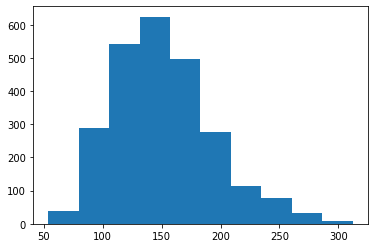

In [5]:
import numpy as np
from sklearn import svm

def distances(data1,order=2.0):
    dist = np.sum( np.abs(data1)**order, axis=1 )**(1/order)
    return dist

def gaussianKernel(x1, x2, sigma=0.1):
    # Ensure that x1 and x2 are column vectors
    x1 = x1.flatten()
    x2 = x2.flatten()
    sim = np.exp(-np.sum(np.power((x1-x2),2))/float((sigma**2)))
    return sim

def gaussianKernelGramMatrixFull(X1, X2, sigma=0.1):   
    """(Pre)calculates Gram Matrix K"""
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
#             print(x1)
            x1 = x1.flatten()
            x2 = x2.flatten()
#             print(x1.shape,x2.shape)
            gram_matrix[i,j] = gaussianKernel(x1, x2,sigma=sigma1)
    return gram_matrix

actual_distances = distances(x_train-np.mean(x_train,axis=0),order=2.0)
plt.hist(actual_distances)
d_50 = np.percentile(actual_distances,50)
sigma1 = d_50/((-np.log(0.5))**0.5)
def my_kernel(X,Y):
    return gaussianKernelGramMatrixFull(X,Y,sigma=sigma1)

clf = svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', gamma='auto', kernel=my_kernel,
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train)

In [6]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred,normalize=True))
print(y_pred)
print(y_test)

0.5432
[2 3 1 ... 2 3 3]
[2 3 2 ... 2 3 3]


fr= 2.0
p= 4.462310016963265
sigma1= 159.26608425713036
0.3308


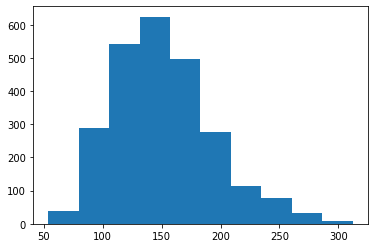

In [9]:
import numpy as np
from sklearn import svm

def distances(data1,order=2.0):
    dist = np.sum( np.abs(data1)**order, axis=1 )**(1/order)
    return dist

def pgaussianKernel(x1, x2, p,sigma=0.1):
    # Ensure that x1 and x2 are column vectors
    x1 = x1.flatten()
    x2 = x2.flatten()
    sim = np.exp(-np.sum(np.power(np.abs(x1-x2),p))/float((sigma**p)))
    return sim

def pgaussianKernelGramMatrixFull(X1, X2, sigma=0.1):           
    """(Pre)calculates Gram Matrix K"""
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
#             print(x1)
            x1 = x1.flatten()
            x2 = x2.flatten()
#             print(x1.shape,x2.shape)
            gram_matrix[i,j] = pgaussianKernel(x1, x2,p,sigma=sigma1)
    return gram_matrix

fr=2.0
print("fr=",fr)
actual_distances = distances(x_train-np.mean(x_train,axis=0),order=fr)
plt.hist(actual_distances)
d_5, d_50, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,50),np.percentile(actual_distances,95)
p = np.log(np.log(0.05)/np.log(0.95)) / np.log(d_95/d_5) 
print("p=",p)
sigma1 = d_50/((-np.log(0.50))**(1/p))
print("sigma1=",sigma1)
def my_kernel(X,Y):
    return pgaussianKernelGramMatrixFull(X,Y,sigma=sigma1)
clf = svm.SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', gamma='auto', kernel=my_kernel,
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred,normalize=True))
#     print(y_pred)
#     print(y_test)

In [ ]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred,normalize=True))
print(y_pred)
print(y_test)